# Import Libraries

In [1]:
import numpy as np
import pandas as pd

# Loading the Data and Selecting the Features

### Import Data

In [5]:
loan_data_inputs_train = pd.read_csv('./Dataset/loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('./Dataset/loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('./Dataset/loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('./Dataset/loan_data_targets_test.csv', index_col = 0)

In [6]:
print(loan_data_inputs_train.shape)
print(loan_data_targets_train.shape)
print(loan_data_inputs_test.shape)
print(loan_data_targets_test.shape)

(373028, 275)
(373028, 1)
(93257, 275)
(93257, 1)


### Explore Data

In [7]:
loan_data_inputs_train.head()

,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,1,0,0,1,0,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,1,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,1,0,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,1,0,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,1,0,1,0,0,0,0,0,0


In [8]:
loan_data_targets_test.head()

,good_bad
362514,1
288564,1
213591,1
263083,1
165001,1


In [10]:
loan_data_targets_train.shape

(373028, 1)

In [12]:
loan_data_inputs_test.head()

,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,362514,19677589,21900299,32500,32500,32500.0,60 months,14.99,773.01,C,...,0,0,0,1,0,0,0,0,0,0
288564,288564,29755527,32278795,11000,11000,11000.0,60 months,20.99,297.53,E,...,0,1,0,1,0,0,0,0,0,0
213591,213591,1343334,1588314,30000,30000,30000.0,36 months,14.65,1034.83,C,...,0,0,0,1,0,0,0,0,0,0
263083,263083,33131681,35775007,14400,14400,14400.0,60 months,14.49,338.74,C,...,0,0,0,1,0,0,0,0,0,0
165001,165001,3293168,4066358,15000,15000,14900.0,36 months,8.90,476.30,A,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
loan_data_targets_test.shape

In [11]:
loan_data_targets_train.head()

,good_bad
427211,1
206088,1
136020,1
412305,0
36159,0


### Selecting the Features

In [13]:
# Here we select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35'
]]

In [14]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',

                  'int_rate:>20.281',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0'
                  ,'annual_inc:<20K',
'dti:>35']

In [15]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories. 
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35
427211,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


# PD Model Estimation

## Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [17]:
reg = LogisticRegression()
# We create an instance of an object from the 'LogisticRegression' class.

In [18]:
pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

In [19]:
loan_data_targets_train.head()

,good_bad
427211,1
206088,1
136020,1
412305,0
36159,0


In [20]:
loan_data_targets_train = loan_data_targets_train['good_bad'].astype('int')
loan_data_targets_test = loan_data_targets_test['good_bad'].astype('int')
loan_data_targets_test.head()

362514    1
288564    1
213591    1
263083    1
165001    1
Name: good_bad, dtype: int32

In [21]:
loan_data_targets_train.unique()

array([1, 0])

In [22]:
inputs_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373028 entries, 427211 to 121958
Data columns (total 75 columns):
 #   Column                               Non-Null Count   Dtype
---  ------                               --------------   -----
 0   grade:A                              373028 non-null  int64
 1   grade:B                              373028 non-null  int64
 2   grade:C                              373028 non-null  int64
 3   grade:D                              373028 non-null  int64
 4   grade:E                              373028 non-null  int64
 5   grade:F                              373028 non-null  int64
 6   home_ownership:OWN                   373028 non-null  int64
 7   home_ownership:MORTGAGE              373028 non-null  int64
 8   addr_state:NM_VA                     373028 non-null  int64
 9   addr_state:NY                        373028 non-null  int64
 10  addr_state:OK_TN_MO_LA_MD_NC         373028 non-null  int64
 11  addr_state:CA                     

In [159]:
inputs_train.shape

(373028, 59)

In [160]:
pd.Series(inputs_train.columns).to_csv("model_pd_vars_selected.csv")

In [23]:
reg.fit(inputs_train, loan_data_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

C:\Users\AdityaKyatham\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [24]:
reg.intercept_
# Displays the intercept contain in the estimated ("fitted") object from the 'LogisticRegression' class.

array([-0.58229041])

In [25]:
reg.coef_
# Displays the coefficients contained in the estimated ("fitted") object from the 'LogisticRegression' class.

array([[ 0.4981675 ,  0.61487333,  0.55690305,  0.47519917,  0.32567397,
         0.1325001 ,  0.13978274,  0.12733746,  0.02878514,  0.05622418,
         0.07262415,  0.05756477,  0.083764  ,  0.15136585,  0.11788256,
         0.18798015,  0.25203468,  0.2264834 ,  0.27101272,  0.3352022 ,
         0.52601688,  0.09182099,  0.09711569,  0.42124961,  0.31487952,
         0.29709396,  0.34641565,  0.30308894,  0.09654611,  0.05953767,
         0.08411465,  0.02856347,  0.04205163,  0.12296703,  1.42328732,
         0.76941871,  0.44709272,  0.12397872, -0.07503843, -0.04058052,
         1.09909245,  0.92760038,  0.68346556, -0.05089214, -0.03339969,
        -0.04776649, -0.04891429, -0.02957898,  0.05542346, -0.01238226,
         0.43253692,  0.49842761,  0.01668786,  0.07596991,  0.14248691,
        -0.04703045,  0.02089618,  0.12183949,  0.19082612,  0.27445157,
         0.349971  ,  0.43240337,  0.45829407,  0.54091918,  0.63990018,
         0.59045639, -0.30560222, -0.12616302, -0.0

In [26]:
feature_name = inputs_train.columns.values
# Stores the names of the columns of a dataframe in a variable.

In [27]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
summary_table

,Feature name,Coefficients
0,Intercept,-0.582290
1,grade:A,0.498167
2,grade:B,0.614873
3,grade:C,0.556903
4,grade:D,0.475199
5,grade:E,0.325674
6,grade:F,0.132500
7,home_ownership:OWN,0.139783
8,home_ownership:MORTGAGE,0.127337
9,addr_state:NM_VA,0.028785


## Build a Logistic Regression Model with P-Values

In [28]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        #self.z_scores = z_scores
        self.p_values = p_values
        #self.sigma_estimates = sigma_estimates
        #self.F_ij = F_ij

In [29]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [30]:
reg = LogisticRegression_with_p_values()
# We create an instance of an object from the newly created 'LogisticRegression_with_p_values()' class.

In [31]:
reg.fit(inputs_train, loan_data_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

C:\Users\AdityaKyatham\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [32]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.582290
1,grade:A,0.498167
2,grade:B,0.614873
3,grade:C,0.556903
4,grade:D,0.475199
5,grade:E,0.325674
6,grade:F,0.132500
7,home_ownership:OWN,0.139783
8,home_ownership:MORTGAGE,0.127337
9,addr_state:NM_VA,0.028785


In [33]:
# This is a list.
p_values = reg.p_values
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.

In [34]:
# Add the intercept for completeness.
p_values = np.append(np.nan, np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.

In [35]:
summary_table['p_values'] = p_values
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.

In [36]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.582290,NaN
1,grade:A,0.498167,1.183367e-08
2,grade:B,0.614873,5.546247e-26
3,grade:C,0.556903,3.257534e-24
4,grade:D,0.475199,2.324242e-19
5,grade:E,0.325674,9.028609e-12
6,grade:F,0.132500,7.766501e-03
7,home_ownership:OWN,0.139783,2.708958e-12
8,home_ownership:MORTGAGE,0.127337,2.510173e-24
9,addr_state:NM_VA,0.028785,3.666416e-01


In [37]:
# We are going to remove some features, the coefficients for all or almost all of the dummy variables for which,
# are not tatistically significant.

# We do that by specifying another list of dummy variables as reference categories, and a list of variables to remove.
# Then, we are going to drop the two datasets from the original list of dummy variables.

# Variables
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35'
]]

ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'int_rate:>20.281',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',]

In [38]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35
427211,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
# Here we run a new model.
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

C:\Users\AdityaKyatham\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [40]:
feature_name = inputs_train.columns.values

In [41]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,0.259806
1,grade:A,0.618924
2,grade:B,0.723813
3,grade:C,0.639684
4,grade:D,0.544536
5,grade:E,0.375834
6,grade:F,0.152139
7,home_ownership:OWN,0.134441
8,home_ownership:MORTGAGE,0.112144
9,addr_state:NM_VA,0.034323


In [42]:
# We add the 'p_values' here, just as we did before.
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table
# Here we get the results for our final PD model.

,Feature name,Coefficients,p_values
0,Intercept,0.259806,NaN
1,grade:A,0.618924,2.903393e-13
2,grade:B,0.723813,5.586961e-40
3,grade:C,0.639684,3.597449e-36
4,grade:D,0.544536,3.425230e-29
5,grade:E,0.375834,1.088792e-18
6,grade:F,0.152139,6.523744e-04
7,home_ownership:OWN,0.134441,1.508458e-11
8,home_ownership:MORTGAGE,0.112144,1.575089e-19
9,addr_state:NM_VA,0.034323,2.793637e-01


In [43]:
import pickle

In [44]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'pd_model.sav'.

# PD Model Validation (Test)

### Out-of-sample validation (test)

In [45]:
# Here, from the dataframe with inputs for testing, we keep the same variables that we used in our final PD model.
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35'
]]

In [46]:
# And here, in the list below, we keep the variable names for the reference categories,
# only for the variables we used in our final PD model.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'int_rate:>20.281',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35']

In [47]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35
362514,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
213591,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [48]:
y_hat_test = reg2.model.predict(inputs_test)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [49]:
y_hat_test
# This is an array of predicted discrete classess (in this case, 0s and 1s).

array([1, 1, 1, ..., 1, 1, 1])

In [50]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)
# Calculates the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [51]:
y_hat_test_proba
# This is an array of arrays of predicted class probabilities for all classes.
# In this case, the first value of every sub-array is the probability for the observation to belong to the first class, i.e. 0,
# and the second value is the probability for the observation to belong to the first class, i.e. 1.

array([[0.12115751, 0.87884249],
       [0.17077615, 0.82922385],
       [0.08846966, 0.91153034],
       ...,
       [0.02940724, 0.97059276],
       [0.05153304, 0.94846696],
       [0.04525804, 0.95474196]])

In [52]:
y_hat_test_proba[:][:,1]
# Here we take all the arrays in the array, and from each array, we take all rows, and only the element with index 1,
# that is, the second element.
# In other words, we take only the probabilities for being 1.

array([0.87884249, 0.82922385, 0.91153034, ..., 0.97059276, 0.94846696,
       0.95474196])

In [53]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]
# We store these probabilities in a variable.

In [54]:
y_hat_test_proba
# This variable contains an array of probabilities of being 1.

array([0.87884249, 0.82922385, 0.91153034, ..., 0.97059276, 0.94846696,
       0.95474196])

In [55]:
loan_data_targets_test_temp = loan_data_targets_test

In [56]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
# We reset the index of a dataframe.

In [57]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# Concatenates two dataframes.

In [58]:
df_actual_predicted_probs.shape

(93257, 2)

In [59]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [60]:
df_actual_predicted_probs.index = loan_data_inputs_test.index
# Makes the index of one dataframe equal to the index of another dataframe.

In [61]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.878842
288564,1,0.829224
213591,1,0.911530
263083,1,0.914839
165001,1,0.966414


### Accuracy and Area under the Curve

In [62]:
tr = 0.9
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [63]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.

Predicted,0,1
Actual,,
0,7375,2815
1,38338,44729


In [64]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]
# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.

Predicted,0,1
Actual,,
0,0.079083,0.030185
1,0.411101,0.479632


In [65]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.

0.5587140911674191

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score

In [67]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.

(array([0.        , 0.        , 0.        , ..., 0.99990186, 0.99990186,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.92615599e-04, ...,
        9.99903692e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.987525  , 0.987525  , 0.98484152, ..., 0.56415785, 0.54061806,
        0.51970217]))

In [68]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Here we store each of the three arrays in a separate variable. 

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

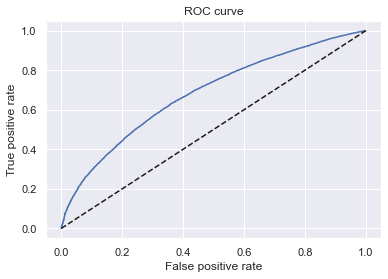

In [70]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [71]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.6820932451833429

### Gini and Kolmogorov-Smirnov

In [72]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')
# Sorts a dataframe by the values of a specific column.

In [73]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
250047,0,0.519702,0
175979,1,0.540618,0
107466,1,0.542522,0
372240,1,0.551301,0
465514,1,0.552550,0


In [74]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
363684,1,0.986148,1
147754,1,0.986417,1
396753,1,0.986891,1
180812,1,0.987238,1
416618,1,0.987525,1


In [75]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
# We reset the index of a dataframe and overwrite it.

In [76]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,250047,0,0.519702,0
1,175979,1,0.540618,0
2,107466,1,0.542522,0
3,372240,1,0.551301,0
4,465514,1,0.552550,0


In [77]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
# We calculate the cumulative number of all observations.
# We use the new index for that. Since indexing in ython starts from 0, we add 1 to each index.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'bad', which is
# the difference between the cumulative number of all observations and cumulative number of 'good' for each row.

In [78]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,250047,0,0.519702,0,1,0,1
1,175979,1,0.540618,0,2,1,1
2,107466,1,0.542522,0,3,2,1
3,372240,1,0.551301,0,4,3,1
4,465514,1,0.552550,0,5,4,1


In [79]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
# We calculate the cumulative percentage of 'bad'.

In [80]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,250047,0,0.519702,0,1,0,1,0.000011,0.000000,0.000098
1,175979,1,0.540618,0,2,1,1,0.000021,0.000012,0.000098
2,107466,1,0.542522,0,3,2,1,0.000032,0.000024,0.000098
3,372240,1,0.551301,0,4,3,1,0.000043,0.000036,0.000098
4,465514,1,0.552550,0,5,4,1,0.000054,0.000048,0.000098


In [81]:
df_actual_predicted_probs.tail()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
93252,363684,1,0.986148,1,93253,83063,10190,0.999957,0.999952,1.0
93253,147754,1,0.986417,1,93254,83064,10190,0.999968,0.999964,1.0
93254,396753,1,0.986891,1,93255,83065,10190,0.999979,0.999976,1.0
93255,180812,1,0.987238,1,93256,83066,10190,0.999989,0.999988,1.0
93256,416618,1,0.987525,1,93257,83067,10190,1.000000,1.000000,1.0


Text(0.5, 1.0, 'Gini')

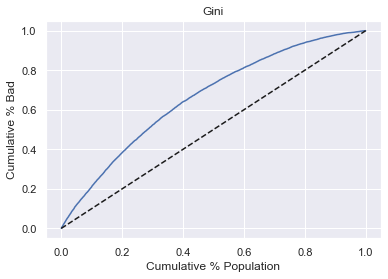

In [82]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini')
# We name the graph "Gini".

In [83]:
Gini = AUROC * 2 - 1
# Here we calculate Gini from AUROC.
Gini

0.3641864903666858

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

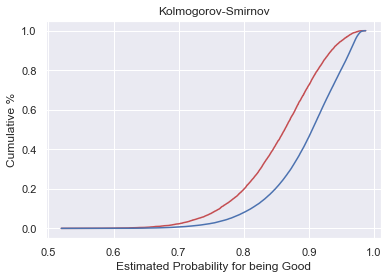

In [84]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good')
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %')
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov')
# We name the graph "Kolmogorov-Smirnov".

In [86]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS

0.27033359559251463

# Applying the PD Model

### Calculating PD of individual accounts

In [88]:
pd.options.display.max_columns = None
# Sets the pandas dataframe options to display all columns/ rows.

In [89]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [90]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,0.259806,NaN
1,grade:A,0.618924,2.903393e-13
2,grade:B,0.723813,5.586961e-40
3,grade:C,0.639684,3.597449e-36
4,grade:D,0.544536,3.425230e-29
5,grade:E,0.375834,1.088792e-18
6,grade:F,0.152139,6.523744e-04
7,home_ownership:OWN,0.134441,1.508458e-11
8,home_ownership:MORTGAGE,0.112144,1.575089e-19
9,addr_state:NM_VA,0.034323,2.793637e-01


In [91]:
y_hat_test_proba

array([0.87884249, 0.82922385, 0.91153034, ..., 0.97059276, 0.94846696,
       0.95474196])

### Creating a Scorecard

In [92]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,0.259806,NaN
1,grade:A,0.618924,2.903393e-13
2,grade:B,0.723813,5.586961e-40
3,grade:C,0.639684,3.597449e-36
4,grade:D,0.544536,3.425230e-29
5,grade:E,0.375834,1.088792e-18
6,grade:F,0.152139,6.523744e-04
7,home_ownership:OWN,0.134441,1.508458e-11
8,home_ownership:MORTGAGE,0.112144,1.575089e-19
9,addr_state:NM_VA,0.034323,2.793637e-01


In [93]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'int_rate:>20.281',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35']

In [94]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
# We create a new dataframe with one column. Its values are the values from the 'reference_categories' list.
# We name it 'Feature name'.
df_ref_categories['Coefficients'] = 0
# We create a second column, called 'Coefficients', which contains only 0 values.
df_ref_categories['p_values'] = np.nan
# We create a third column, called 'p_values', with contains only NaN values.
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,int_rate:>20.281,0,NaN
9,acc_now_delinq:0,0,NaN


In [95]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
# Concatenates two dataframes.
df_scorecard = df_scorecard.reset_index()
# We reset the index of a dataframe.
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,0.259806,NaN
1,1,grade:A,0.618924,2.903393e-13
2,2,grade:B,0.723813,5.586961e-40
3,3,grade:C,0.639684,3.597449e-36
4,4,grade:D,0.544536,3.425230e-29
5,5,grade:E,0.375834,1.088792e-18
6,6,grade:F,0.152139,6.523744e-04
7,7,home_ownership:OWN,0.134441,1.508458e-11
8,8,home_ownership:MORTGAGE,0.112144,1.575089e-19
9,9,addr_state:NM_VA,0.034323,2.793637e-01


In [96]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
# We create a new column, called 'Original feature name', which contains the value of the 'Feature name' column,
# up to the column symbol.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,0.259806,NaN,Intercept
1,1,grade:A,0.618924,2.903393e-13,grade
2,2,grade:B,0.723813,5.586961e-40,grade
3,3,grade:C,0.639684,3.597449e-36,grade
4,4,grade:D,0.544536,3.425230e-29,grade
5,5,grade:E,0.375834,1.088792e-18,grade
6,6,grade:F,0.152139,6.523744e-04,grade
7,7,home_ownership:OWN,0.134441,1.508458e-11,home_ownership
8,8,home_ownership:MORTGAGE,0.112144,1.575089e-19,home_ownership
9,9,addr_state:NM_VA,0.034323,2.793637e-01,addr_state


In [97]:
min_score = 300
max_score = 850

In [98]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.

Original feature name
Intercept              0.259806
acc_now_delinq         0.000000
addr_state             0.000000
annual_inc            -0.057531
dti                   -0.347235
emp_length             0.000000
grade                  0.000000
home_ownership         0.000000
initial_list_status    0.000000
int_rate               0.000000
purpose                0.000000
term                   0.000000
verification_status    0.000000
Name: Coefficients, dtype: float64

In [99]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the minimum values.
min_sum_coef

-0.1449595959845884

In [100]:

df_scorecard.groupby('Original feature name')['Coefficients'].max()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.

Original feature name
Intercept              0.259806
acc_now_delinq         0.215757
addr_state             0.504806
annual_inc             0.605913
dti                    0.000000
emp_length             0.132509
grade                  0.723813
home_ownership         0.134441
initial_list_status    0.312307
int_rate               1.446024
purpose                0.437975
term                   0.060490
verification_status    0.099541
Name: Coefficients, dtype: float64

In [101]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the maximum values.
max_sum_coef

4.933381600211348

In [102]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
# We multiply the value of the 'Coefficients' column by the ration of the differences between
# maximum score and minimum score and maximum sum of coefficients and minimum sum of cefficients.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,0.259806,NaN,Intercept,28.137745
1,1,grade:A,0.618924,2.903393e-13,grade,67.031344
2,2,grade:B,0.723813,5.586961e-40,grade,78.391134
3,3,grade:C,0.639684,3.597449e-36,grade,69.279729
4,4,grade:D,0.544536,3.425230e-29,grade,58.974960
5,5,grade:E,0.375834,1.088792e-18,grade,40.704019
6,6,grade:F,0.152139,6.523744e-04,grade,16.477091
7,7,home_ownership:OWN,0.134441,1.508458e-11,home_ownership,14.560428
8,8,home_ownership:MORTGAGE,0.112144,1.575089e-19,home_ownership,12.145559
9,9,addr_state:NM_VA,0.034323,2.793637e-01,addr_state,3.717238


In [103]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
# We divide the difference of the value of the 'Coefficients' column and the minimum sum of coefficients by
# the difference of the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we multiply that by the difference between the maximum score and the minimum score.
# Then, we add minimum score. 
df_scorecard

C:\Users\AdityaKyatham\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,0.259806,NaN,Intercept,343.837316
1,1,grade:A,0.618924,2.903393e-13,grade,67.031344
2,2,grade:B,0.723813,5.586961e-40,grade,78.391134
3,3,grade:C,0.639684,3.597449e-36,grade,69.279729
4,4,grade:D,0.544536,3.425230e-29,grade,58.974960
5,5,grade:E,0.375834,1.088792e-18,grade,40.704019
6,6,grade:F,0.152139,6.523744e-04,grade,16.477091
7,7,home_ownership:OWN,0.134441,1.508458e-11,home_ownership,14.560428
8,8,home_ownership:MORTGAGE,0.112144,1.575089e-19,home_ownership,12.145559
9,9,addr_state:NM_VA,0.034323,2.793637e-01,addr_state,3.717238


In [104]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
# We round the values of the 'Score - Calculation' column.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,0.259806,NaN,Intercept,343.837316,344.0
1,1,grade:A,0.618924,2.903393e-13,grade,67.031344,67.0
2,2,grade:B,0.723813,5.586961e-40,grade,78.391134,78.0
3,3,grade:C,0.639684,3.597449e-36,grade,69.279729,69.0
4,4,grade:D,0.544536,3.425230e-29,grade,58.974960,59.0
5,5,grade:E,0.375834,1.088792e-18,grade,40.704019,41.0
6,6,grade:F,0.152139,6.523744e-04,grade,16.477091,16.0
7,7,home_ownership:OWN,0.134441,1.508458e-11,home_ownership,14.560428,15.0
8,8,home_ownership:MORTGAGE,0.112144,1.575089e-19,home_ownership,12.145559,12.0
9,9,addr_state:NM_VA,0.034323,2.793637e-01,addr_state,3.717238,4.0


In [105]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

300.0

In [106]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums alal maximum values.
max_sum_score_prel

851.0

In [107]:
# One has to be subtracted from the maximum score for one original variable. Which one? We'll evaluate based on differences.

In [108]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,0.259806,NaN,Intercept,343.837316,344.0,0.162684
1,1,grade:A,0.618924,2.903393e-13,grade,67.031344,67.0,-0.031344
2,2,grade:B,0.723813,5.586961e-40,grade,78.391134,78.0,-0.391134
3,3,grade:C,0.639684,3.597449e-36,grade,69.279729,69.0,-0.279729
4,4,grade:D,0.544536,3.425230e-29,grade,58.974960,59.0,0.025040
5,5,grade:E,0.375834,1.088792e-18,grade,40.704019,41.0,0.295981
6,6,grade:F,0.152139,6.523744e-04,grade,16.477091,16.0,-0.477091
7,7,home_ownership:OWN,0.134441,1.508458e-11,home_ownership,14.560428,15.0,0.439572
8,8,home_ownership:MORTGAGE,0.112144,1.575089e-19,home_ownership,12.145559,12.0,-0.145559
9,9,addr_state:NM_VA,0.034323,2.793637e-01,addr_state,3.717238,4.0,0.282762


In [109]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][77] = 16
df_scorecard

C:\Users\AdityaKyatham\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,0.259806,NaN,Intercept,343.837316,344.0,0.162684,344.0
1,1,grade:A,0.618924,2.903393e-13,grade,67.031344,67.0,-0.031344,67.0
2,2,grade:B,0.723813,5.586961e-40,grade,78.391134,78.0,-0.391134,78.0
3,3,grade:C,0.639684,3.597449e-36,grade,69.279729,69.0,-0.279729,69.0
4,4,grade:D,0.544536,3.425230e-29,grade,58.974960,59.0,0.025040,59.0
5,5,grade:E,0.375834,1.088792e-18,grade,40.704019,41.0,0.295981,41.0
6,6,grade:F,0.152139,6.523744e-04,grade,16.477091,16.0,-0.477091,16.0
7,7,home_ownership:OWN,0.134441,1.508458e-11,home_ownership,14.560428,15.0,0.439572,15.0
8,8,home_ownership:MORTGAGE,0.112144,1.575089e-19,home_ownership,12.145559,12.0,-0.145559,12.0
9,9,addr_state:NM_VA,0.034323,2.793637e-01,addr_state,3.717238,4.0,0.282762,4.0


In [110]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

300.0

In [111]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel

851.0

### Caclulating Credit Score

In [112]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [113]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,0.259806,NaN,Intercept,343.837316,344.0,0.162684,344.0
1,1,grade:A,0.618924,2.903393e-13,grade,67.031344,67.0,-0.031344,67.0
2,2,grade:B,0.723813,5.586961e-40,grade,78.391134,78.0,-0.391134,78.0
3,3,grade:C,0.639684,3.597449e-36,grade,69.279729,69.0,-0.279729,69.0
4,4,grade:D,0.544536,3.425230e-29,grade,58.974960,59.0,0.025040,59.0
5,5,grade:E,0.375834,1.088792e-18,grade,40.704019,41.0,0.295981,41.0
6,6,grade:F,0.152139,6.523744e-04,grade,16.477091,16.0,-0.477091,16.0
7,7,home_ownership:OWN,0.134441,1.508458e-11,home_ownership,14.560428,15.0,0.439572,15.0
8,8,home_ownership:MORTGAGE,0.112144,1.575089e-19,home_ownership,12.145559,12.0,-0.145559,12.0
9,9,addr_state:NM_VA,0.034323,2.793637e-01,addr_state,3.717238,4.0,0.282762,4.0


In [114]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [115]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
# We insert a column in the dataframe, with an index of 0, that is, in the beginning of the dataframe.
# The name of that column is 'Intercept', and its values are 1s.

In [116]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35
362514,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
288564,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
213591,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
165001,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [117]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
# Here, from the 'inputs_test_with_ref_cat_w_intercept' dataframe, we keep only the columns with column names,
# exactly equal to the row values of the 'Feature name' column from the 'df_scorecard' dataframe.

In [118]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,initial_list_status:f,term:60,emp_length:0,int_rate:>20.281,acc_now_delinq:0,annual_inc:<20K,dti:>35
362514,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0
288564,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0
213591,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
263083,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
165001,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0


In [119]:
scorecard_scores = df_scorecard['Score - Final']

In [120]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 72)

In [121]:
scorecard_scores.shape

(72,)

In [124]:
scorecard_scores = scorecard_scores.values.reshape(72, 1)

In [125]:
scorecard_scores.shape

(72, 1)

In [126]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)
# Here we multiply the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sum them. It's essentially the sum of the products.

In [127]:
y_scores.head()

,0
362514,529.0
288564,487.0
213591,569.0
263083,572.0
165001,679.0


In [128]:
y_scores.tail()

,0
115,564.0
296284,625.0
61777,696.0
91763,632.0
167512,646.0


### From Credit Score to PD

In [129]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef
# We divide the difference between the scores and the minimum score by
# the difference between the maximum score and the minimum score.
# Then, we multiply that by the difference between the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we add the minimum sum of coefficients.

In [130]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
# Here we divide an exponent raised to sum of coefficients from score by
# an exponent raised to sum of coefficients from score plus one.
y_hat_proba_from_score.head()

,0
362514,0.877555
288564,0.829442
213591,0.912041
263083,0.914238
165001,0.966251


In [131]:
y_hat_test_proba[0: 5]

array([0.87884249, 0.82922385, 0.91153034, 0.91483887, 0.96641368])

In [132]:
df_actual_predicted_probs['y_hat_test_proba'].head()

0    0.519702
1    0.540618
2    0.542522
3    0.551301
4    0.552550
Name: y_hat_test_proba, dtype: float64

### Setting Cut-offs

In [133]:
# We need the confusion matrix again.
#np.where(np.squeeze(np.array(loan_data_targets_test)) == np.where(y_hat_test_proba >= tr, 1, 0), 1, 0).sum() / loan_data_targets_test.shape[0]
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)
#df_actual_predicted_probs['loan_data_targets_test'] == np.where(df_actual_predicted_probs['y_hat_test_proba'] >= tr, 1, 0)

In [134]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7375,2815
1,38338,44729


In [135]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.079083,0.030185
1,0.411101,0.479632


In [136]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5587140911674191

In [137]:
from sklearn.metrics import roc_curve, roc_auc_score

In [138]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99990186, 0.99990186,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.92615599e-04, ...,
        9.99903692e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.987525  , 0.987525  , 0.98484152, ..., 0.56415785, 0.54061806,
        0.51970217]))

In [139]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

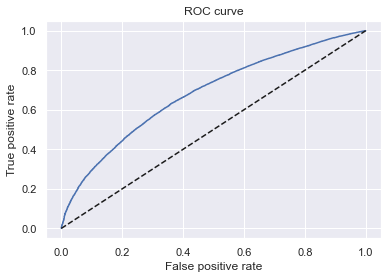

In [141]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [142]:
thresholds

array([1.987525  , 0.987525  , 0.98484152, ..., 0.56415785, 0.54061806,
       0.51970217])

In [143]:
thresholds.shape

(25042,)

In [144]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)
# We concatenate 3 dataframes along the columns.

In [145]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']
# We name the columns of the dataframe 'thresholds', 'fpr', and 'tpr'.

In [146]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.987525,0.0,0.000000
1,0.987525,0.0,0.000012
2,0.984842,0.0,0.000193
3,0.984829,0.0,0.000217
4,0.984580,0.0,0.000313


In [147]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)
# Let the first threshold (the value of the thresholds column with index 0) be equal to a number, very close to 1
# but smaller than 1, say 1 - 1 / 10 ^ 16.

In [148]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()
# The score corresponsing to each threshold equals:
# The the difference between the natural logarithm of the ratio of the threshold and 1 minus the threshold and
# the minimum sum of coefficients
# multiplied by
# the sum of the minimum score and the ratio of the difference between the maximum score and minimum score and 
# the difference between the maximum sum of coefficients and the minimum sum of coefficients.

In [149]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.0,0.000000,2628.0
1,0.987525,0.0,0.000012,789.0
2,0.984842,0.0,0.000193,768.0
3,0.984829,0.0,0.000217,768.0
4,0.984580,0.0,0.000313,766.0


In [150]:
df_cutoffs['Score'][0] = max_score

In [151]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.0,0.000000,850.0
1,0.987525,0.0,0.000012,789.0
2,0.984842,0.0,0.000193,768.0
3,0.984829,0.0,0.000217,768.0
4,0.984580,0.0,0.000313,766.0


In [152]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
25037,0.575911,0.999804,0.999868,349.0
25038,0.565567,0.999804,0.999904,344.0
25039,0.564158,0.999902,0.999904,344.0
25040,0.540618,0.999902,1.000000,333.0
25041,0.519702,1.000000,1.000000,324.0


In [153]:
# We define a function called 'n_approved' which assigns a value of 1 if a predicted probability
# is greater than the parameter p, which is a threshold, and a value of 0, if it is not.
# Then it sums the column.
# Thus, if given any percentage values, the function will return
# the number of rows wih estimated probabilites greater than the threshold. 
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [154]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
# Assuming that all credit applications above a given probability of being 'good' will be approved,
# when we apply the 'n_approved' function to a threshold, it will return the number of approved applications.
# Thus, here we calculate the number of approved appliations for al thresholds.
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
# Then, we calculate the number of rejected applications for each threshold.
# It is the difference between the total number of applications and the approved applications for that threshold.
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
# Approval rate equalts the ratio of the approved applications and all applications.
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']
# Rejection rate equals one minus approval rate.

In [155]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.0,0.000000,850.0,0,93257,0.000000,1.000000
1,0.987525,0.0,0.000012,789.0,1,93256,0.000011,0.999989
2,0.984842,0.0,0.000193,768.0,16,93241,0.000172,0.999828
3,0.984829,0.0,0.000217,768.0,18,93239,0.000193,0.999807
4,0.984580,0.0,0.000313,766.0,26,93231,0.000279,0.999721


In [156]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
25037,0.575911,0.999804,0.999868,349.0,93244,13,0.999861,0.000139
25038,0.565567,0.999804,0.999904,344.0,93247,10,0.999893,0.000107
25039,0.564158,0.999902,0.999904,344.0,93248,9,0.999903,0.000097
25040,0.540618,0.999902,1.000000,333.0,93256,1,0.999989,0.000011
25041,0.519702,1.000000,1.000000,324.0,93257,0,1.000000,0.000000


In [ ]:
df_cutoffs.iloc[5000: 6200, ]
# Here we display the dataframe with cutoffs form line with index 5000 to line with index 6200.

In [ ]:
df_cutoffs.iloc[1000: 2000, ]
# Here we display the dataframe with cutoffs form line with index 1000 to line with index 2000.

In [157]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [158]:
df_scorecard.to_csv('df_scorecard.csv')